In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [2]:
df = pd.read_csv("adult.data.csv")
  

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
def val_count(data):
    for i in data.columns:
        print(i)
        print(data[i].value_counts(dropna=False))
        print(25 * "*-","\n")

In [7]:
val_count(df)

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school      

---
---

In [8]:
unknown_wrkcls = df["workclass"] == "?" 

unknown_wrkcls

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool

In [9]:
df[unknown_wrkcls]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
# df[unknown_wrkcls]["workclass"] = "Unknown"
df.loc[unknown_wrkcls,"workclass"] = "Unknown"
df.iloc[[27]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,Unknown,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


---
---

In [12]:
unknown_occupation = df["occupation"] == "?"

In [13]:
df[unknown_occupation]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,Unknown,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,Unknown,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Unknown,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Unknown,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Unknown,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Unknown,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Unknown,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Unknown,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
df.loc[unknown_occupation, "occupation"] = "Unknown"
df.iloc[[27]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,Unknown,180211,Some-college,10,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


---
---

In [15]:
unknow_country = df["native-country"] == "?"

In [16]:
df[unknow_country]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [17]:
df.loc[unknow_country, "native-country"] = "Unknown"

df.iloc[[14]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K


In [18]:
def replacer(df,value,subtitude):
    for i in df.columns:
        if df[i].isin([value]).any():
            print(i, "Column has changed")
            unknow = df[i] == value
            df.loc[unknow, i] = subtitude
replacer(df, "?", "Unknown")    

In [19]:
for i in df.columns:
    df[i].replace("?", "Unknown")

---
---

In [20]:
df.groupby("education")["education-num"].value_counts()  
# df.groupby("education")["education-num"].count().sort_values()

education     education-num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: education-num, dtype: int64

In [21]:
df["education-num"].value_counts() #.sort_values()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [22]:
df.drop("education-num", axis= 1, inplace= True)  # I think "education-num" and "education" columns have the same knowledge

---
---

In [23]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [24]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

---
---

In [25]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [26]:
np.tril(np.ones(4))

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [27]:
mask = np.tril(np.ones(df.corr().shape)).astype(np.bool) 

mask

array([[ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True]])

In [28]:
df.corr().where(mask)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,NaN,NaN,NaN,NaN
fnlwgt,-0.076646,1.000000,NaN,NaN,NaN
capital-gain,0.077674,0.000432,1.000000,NaN,NaN
capital-loss,0.057775,-0.010252,-0.031615,1.000000,NaN
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.0


In [29]:
df.describe(include="all")

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [30]:
IQR = (48-28)

In [31]:
48 + 1.5*IQR

78.0

In [32]:
df[df["age"] >= 78]["age"].value_counts()

90    43
78    23
80    22
79    22
81    20
82    12
84    10
83     6
88     3
85     3
87     1
86     1
Name: age, dtype: int64

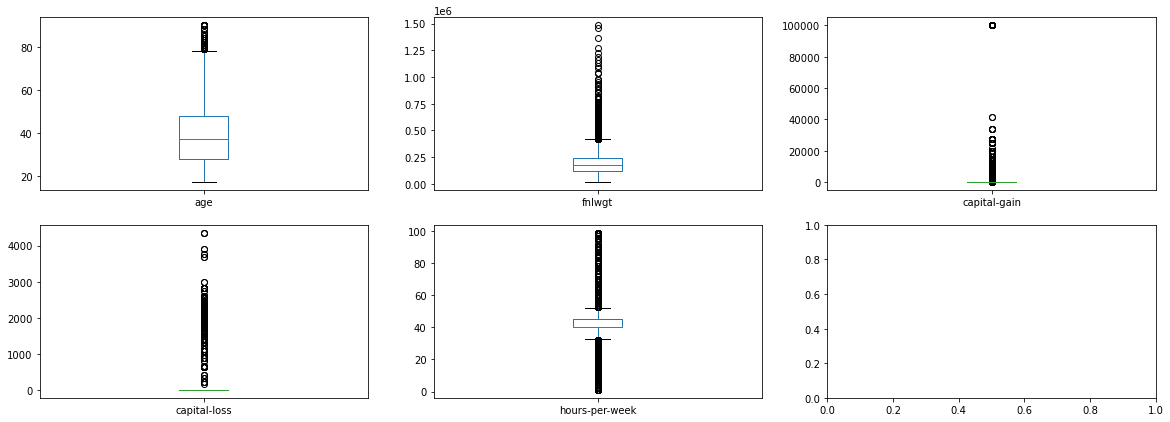

In [33]:
fig ,axs = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = axs[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [34]:
df[df["age"] >= 78].describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,166.000000,166.000000,166.000000,166.00000,166.000000
mean,83.108434,161041.716867,1825.445783,129.89759,27.783133
std,4.568700,89983.970649,8668.568318,618.83793,16.890053
min,78.000000,20101.000000,0.000000,0.00000,1.000000
25%,79.000000,93196.250000,0.000000,0.00000,15.000000
50%,81.000000,146670.500000,0.000000,0.00000,25.000000
75%,90.000000,202211.750000,0.000000,0.00000,40.000000
max,90.000000,562336.000000,99999.000000,4356.00000,99.000000


In [35]:
df[(df["age"] >= 78)].sample(20)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27795,84,Private,388384,7th-8th,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,10,United-States,<=50K
21501,81,Private,177408,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2377,26,United-States,>50K
5590,78,Unknown,363134,HS-grad,Widowed,Unknown,Not-in-family,White,Female,0,0,1,United-States,<=50K
16682,78,Self-emp-inc,385242,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,9386,0,45,United-States,>50K
14903,79,Self-emp-inc,309272,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
12975,90,Private,250832,10th,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
29594,81,Self-emp-not-inc,193237,1st-4th,Widowed,Sales,Other-relative,White,Male,0,0,45,Mexico,<=50K
18272,80,Private,86111,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,<=50K
14711,84,Local-gov,135839,Assoc-voc,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,14,United-States,<=50K
10124,80,Self-emp-not-inc,34340,7th-8th,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,35,United-States,<=50K


In [36]:
df[(df["hours-per-week"] == 99)].sample(20)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
21147,39,Private,348521,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2415,99,United-States,>50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
15460,37,Private,241174,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K
10143,35,Unknown,164866,10th,Divorced,Unknown,Not-in-family,White,Male,0,0,99,United-States,<=50K
26638,55,Self-emp-not-inc,185195,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,<=50K
4308,35,Self-emp-not-inc,166416,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
17611,28,Self-emp-not-inc,104617,7th-8th,Never-married,Other-service,Other-relative,White,Female,0,0,99,Mexico,<=50K
29989,43,Local-gov,118853,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,4386,0,99,United-States,>50K
25806,49,Unknown,31478,7th-8th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,99,United-States,<=50K
26596,35,Private,297574,Assoc-acdm,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,>50K


In [37]:
df[(df["hours-per-week"] == 99)][["age"]].agg(["median","mean","count"])

,age
median,42.000000
mean,43.517647
count,85.000000


In [38]:
df[(df["age"] >= 78) & (df["hours-per-week"] == 99)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K


In [39]:
99/7 

14.142857142857142

In [40]:
df.groupby(by = ["age", "workclass"])["hours-per-week"].agg(["mean","median","min","max","count"]).loc[90]

,mean,median,min,max,count
workclass,,,,,
Federal-gov,30.000000,30.0,30,30,1
Local-gov,40.000000,40.0,20,60,4
Private,40.428571,40.0,10,99,28
Self-emp-not-inc,34.000000,40.0,12,50,3
Unknown,22.714286,15.0,4,40,7


In [41]:
df.drop(index =15356, inplace= True)

---
# How many of each race are represented in this dataset?
---

In [42]:
race_count = df.race.value_counts()
race_count

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

<AxesSubplot:>

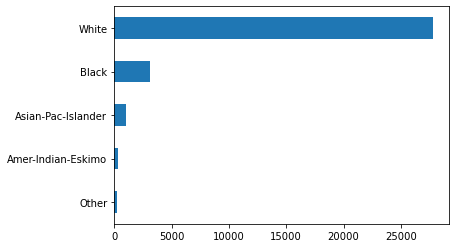

In [43]:
race_count.sort_values().plot.barh()

---
# What is the average age of men/women?
---

In [44]:
average_age_men = df.loc[df["sex"] == "Male", "age"].mean()
average_age_men

39.43122676579926

In [45]:
round(average_age_men,1)

39.4

In [46]:
df.loc[df["sex"] == "Male", "age"].median()

38.0

In [47]:
df.loc[df["sex"] == "Male", "age"].mode()

0    35
dtype: int64

In [48]:
df.loc[df["sex"] == "Male", "age"].std()

13.366547605230599

<AxesSubplot:>

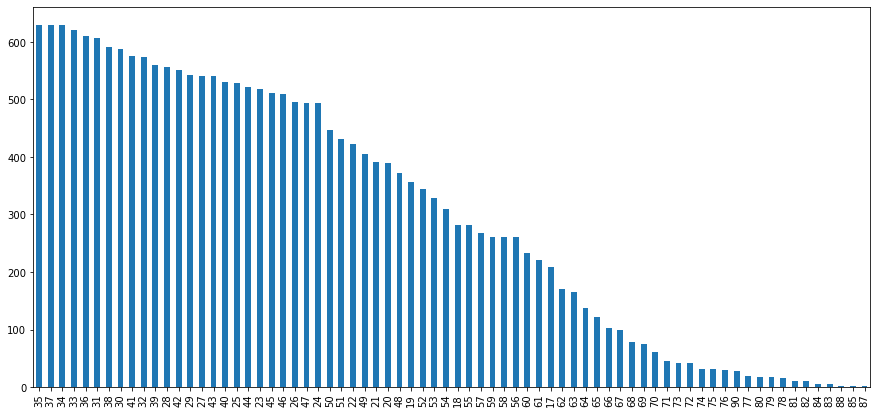

In [49]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar()

In [50]:
average_age_women = df.loc[df["sex"] == "Female", "age"].mean()
average_age_women 

36.85823043357163

In [51]:
df.loc[df["sex"] == "Female", "age"].median()

35.0

In [52]:
df.loc[df["sex"] == "Female", "age"].mode()

0    20
dtype: int64

In [53]:
df.loc[df["sex"] == "Female", "age"].std()

14.01369709943824

<AxesSubplot:>

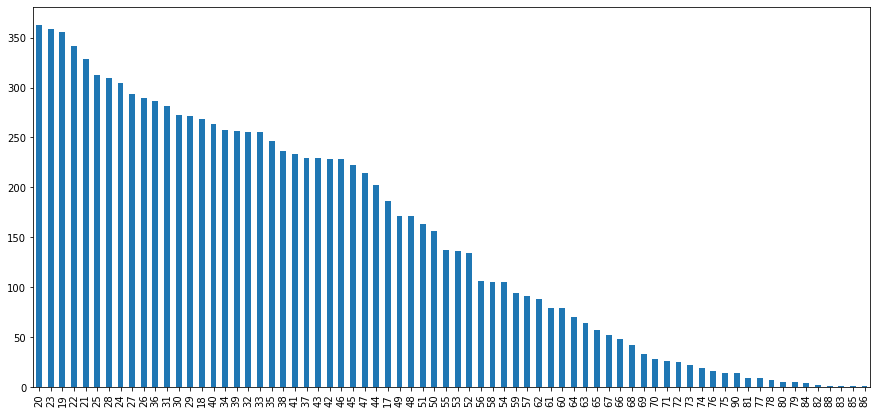

In [54]:

plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar()

---
# What is the percentage of people who have a Bachelor's degree?
---

In [55]:
df.groupby("education").education.count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10500
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64

In [56]:
df["education"].value_counts()

HS-grad         10500
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [57]:
upper = df.groupby("education").education.count().loc["Bachelors"]

lower = df.groupby("education").education.count().sum()

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.4465601965602

In [58]:
df["education"].value_counts(normalize=True)

HS-grad         0.322482
Some-college    0.223925
Bachelors       0.164466
Masters         0.052918
Assoc-voc       0.042445
11th            0.036087
Assoc-acdm      0.032770
10th            0.028655
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013299
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

In [59]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [60]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [61]:
df.salary.value_counts()

<=50K    24719
>50K      7841
Name: salary, dtype: int64

In [62]:
df.education.value_counts()

HS-grad         10500
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [63]:
higher_education = (df["education"] == "Bachelors")|(df["education"] == "Masters")|(df["education"] == "Doctorate")
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32560, dtype: bool

In [64]:
df_high_edu = df[higher_education]
df_high_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [65]:
df_high_edu["salary"] ==  ">50K"

0        False
1        False
4        False
5        False
8         True
         ...  
32538     True
32539     True
32544    False
32553    False
32554     True
Name: salary, Length: 7491, dtype: bool

In [66]:
df_high_edu[df_high_edu["salary"] == ">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,Unknown,287372,Doctorate,Married-civ-spouse,Unknown,Husband,White,Male,0,0,10,United-States,>50K


In [67]:
count =df_high_edu[df_high_edu["salary"] == ">50K"].education.count()
shape = df_high_edu[df_high_edu["salary"] == ">50K"].shape[0]

In [68]:
print(f"with shape atribute {shape}\nwith count method {count}")


with shape atribute 3486
with count method 3486


In [69]:
perc_high_edu = count / df["education"].size    

In [70]:
perc_high_edu

0.10706388206388207

In [71]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.71


---
# What percentage of people without advanced education make more than 50K?
---

In [72]:
lower_education = ~higher_education

In [73]:
df_low_edu = df[lower_education]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [74]:
df_low_edu[df_low_edu["salary"] == ">50K"]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [75]:
count =df_low_edu[df_low_edu["salary"] == ">50K"].education.count()

In [76]:
count

4355

In [77]:
perc_low_edu = count / df["education"].size  

In [78]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [79]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


In [80]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [81]:
df["hours-per-week"].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [82]:
lazy_riches = (df["hours-per-week"] == df["hours-per-week"].min())&(df["salary"] == ">50K")
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32560, dtype: bool

In [83]:
df[lazy_riches]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [84]:
num_lazy_riches = df[lazy_riches].shape[0]
num_lazy_riches

2

In [85]:
num_min_workers = df[(df["hours-per-week"] == df["hours-per-week"].min())].shape[0]
num_min_workers

20

In [86]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [87]:
country_salary_df = df.groupby(by=["native-country"])[["salary"]].count()
country_salary_df

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [88]:
country_salary_df_riches = df[df["salary"] == ">50K"].groupby(by=["native-country",])[["salary"]].count()
country_salary_df_riches

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [89]:
rich_per_country =( country_salary_df_riches / country_salary_df ).sort_values("salary",ascending=True)
rich_per_country

,salary
native-country,
Dominican-Republic,0.028571
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051322
Nicaragua,0.058824
Peru,0.064516
Vietnam,0.074627
Honduras,0.076923
El-Salvador,0.084906


In [90]:
rich_per_country[rich_per_country["salary"] == rich_per_country["salary"].max()]

,salary
native-country,
Iran,0.418605


In [91]:
rich_per_country.sort_values("salary",ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.418605


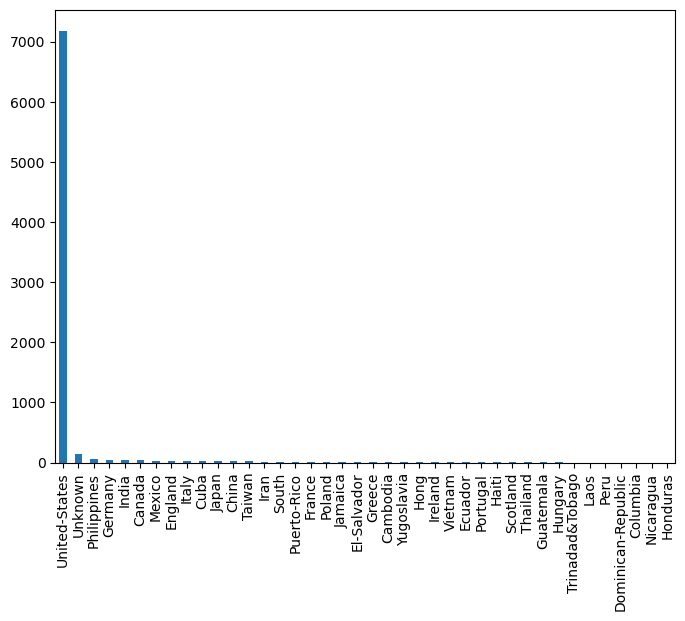

In [95]:
plt.figure(figsize=(8,6),dpi=100)
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar"); #.mean()

In [96]:

#df.loc[((df["salary"] == ">50K") & (df["native-country"] == "Iran")), "native-country"].count()

In [97]:
#df.loc[((df["native-country"] == "Iran")), "native-country"].count()

<AxesSubplot:>

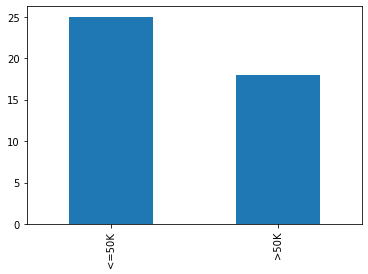

In [98]:
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar()

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [99]:
top_IN_occupation = (df["native-country"] == "India")&(df["salary"] == ">50K")

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32560, dtype: bool

In [100]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Not-in-family,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K


In [101]:
df[top_IN_occupation]["occupation"].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [102]:
df[top_IN_occupation]["occupation"].value_counts().index[0]



'Prof-specialty'

In [103]:
a = df[top_IN_occupation]["occupation"].mode()[0]
a

'Prof-specialty'

In [104]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---

# If the age raises, does the salary increase also

In [214]:
df["sal"]=df.salary.replace({">50K":51,"<=50K":25})

In [215]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,sal
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,25
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,25
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,25
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,25
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,25


<AxesSubplot:xlabel='age'>

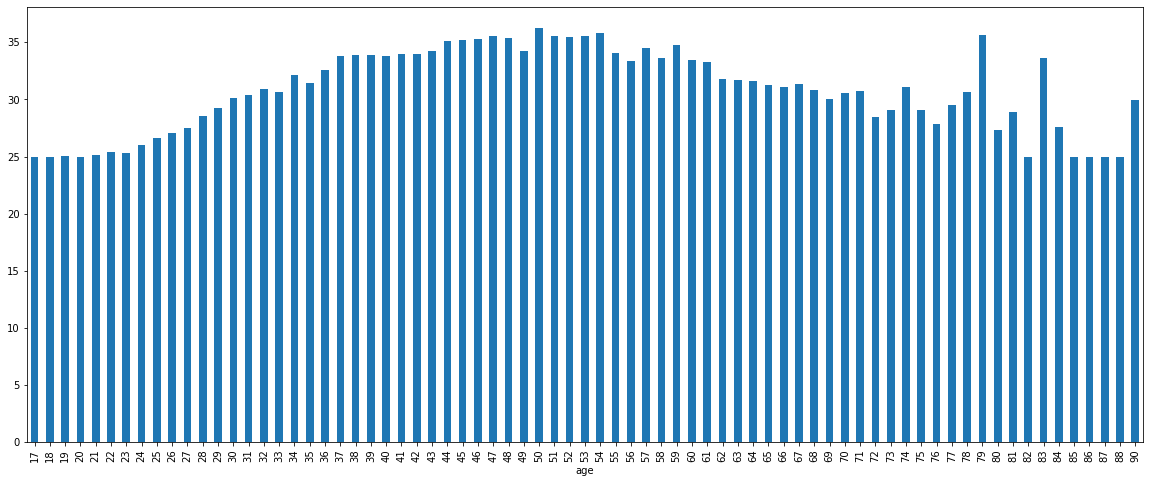

In [216]:
plt.figure(figsize=(20,8))
df.groupby(["age"]).sal.mean().plot.bar()

# What is the woking-hours distribution among US native?

In [217]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary', 'sal'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

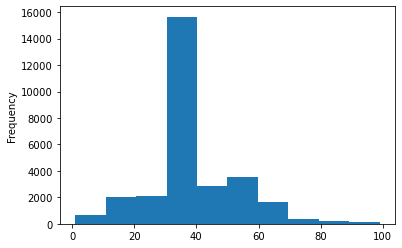

In [237]:
df[df["native-country"]=="United-States"]["hours-per-week"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

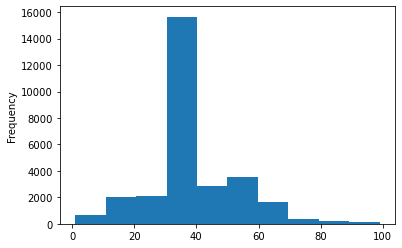

In [232]:
df.loc[(df["native-country"]=="United-States"),'hours-per-week'].plot.hist()

# What is the most seen salary within married people?

In [219]:
df["marital-status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    992
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [238]:
married= df["marital-status"].str.contains("Married", na = False)
married

0        False
1         True
2        False
3         True
4         True
         ...  
32556     True
32557     True
32558    False
32559    False
32560     True
Name: marital-status, Length: 32560, dtype: bool

In [243]:
df[married].salary.value_counts()[[0]]

<=50K    8681
Name: salary, dtype: int64

# Avarage marriage rate in terms of nationality?

In [222]:
df["married"]=married

In [245]:
df.groupby('native-country')["married"].value_counts(normalize=True)[:,True]

native-country
Cambodia                      0.631579
Canada                        0.545455
China                         0.746667
Columbia                      0.406780
Cuba                          0.547368
Dominican-Republic            0.442857
Ecuador                       0.571429
El-Salvador                   0.396226
England                       0.433333
France                        0.448276
Germany                       0.474453
Greece                        0.724138
Guatemala                     0.343750
Haiti                         0.454545
Honduras                      0.307692
Hong                          0.650000
Hungary                       0.461538
India                         0.730000
Iran                          0.581395
Ireland                       0.375000
Italy                         0.698630
Jamaica                       0.382716
Japan                         0.516129
Laos                          0.666667
Mexico                        0.542768
Nicaragua 

In [226]:
df.head(3)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,sal,married
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,25,False
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,25,True
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,25,False
